# ***Import library***

In [2]:
import geopandas as gpd
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline
# plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 8)

In [85]:
df = pd.read_csv("result_latest.csv")
df.head()

,sourceid,dstid,dow,area_reci_src,area_reci_dst,fastest_travel_time,maxspeed_traveltime,dist_geo_sqrt,oneway_length_sqrt,la_name_src,la_name_dst,pd_src,pd_dst,direction,mean_travel_time,predicted,diff,diff_in_%,sqrt_diff
0,925,359,3,1.981473,0.773742,887,43,82.868313,67.801180,29,32,16792,12564,-101,1864.20,1864.2987,0.098706,0.005295,0.314175
1,411,204,1,0.682249,2.179908,1276,46,112.724756,57.671483,1,18,4600,16697,166,2395.00,2395.1646,0.164551,0.006871,0.405649
2,411,136,6,0.682249,0.871657,368,48,62.550434,16.401219,1,9,4600,4127,156,663.78,663.6747,0.105317,0.015866,0.324526
3,729,351,6,0.725084,1.790017,1274,48,112.878388,70.753092,17,31,4854,9624,102,2167.57,2166.9917,0.578301,0.026680,0.760461
4,693,675,7,0.863371,0.372051,987,49,99.955928,80.616376,14,16,5000,2671,-120,1377.26,1377.7056,0.445566,0.032352,0.667508


In [90]:
df.tail(20)

,sourceid,dstid,dow,area_reci_src,area_reci_dst,fastest_travel_time,maxspeed_traveltime,dist_geo_sqrt,oneway_length_sqrt,la_name_src,la_name_dst,pd_src,pd_dst,direction,mean_travel_time,predicted,diff,diff_in_%,sqrt_diff
1946,746,750,3,1.543479,1.428355,224,32,29.032429,7.615773,18,18,16697,16697,-135,179.39,288.05470,108.664687,60.574551,10.424236
1947,887,814,7,2.265093,2.534424,133,44,26.794703,0.000000,24,24,9808,9808,-32,144.74,236.58258,91.842581,63.453489,9.583453
1948,607,379,3,1.368785,0.381975,215,49,55.204726,57.671483,10,2,6105,4117,102,224.64,383.77536,159.135360,70.840171,12.614886
1949,190,195,3,0.571001,1.022242,328,46,44.076449,32.848135,14,14,5000,5000,116,219.07,374.45750,155.387489,70.930519,12.465452
1950,434,425,2,0.788152,0.564321,477,49,61.861544,72.173402,3,3,7581,7581,66,327.63,579.03827,251.408269,76.735424,15.855859
1951,79,443,5,0.529928,0.088649,212,42,47.674903,9.643651,4,4,2216,2216,124,137.57,247.35112,109.781120,79.800189,10.477649
1952,967,339,7,2.480854,1.273178,207,32,24.023872,15.968719,31,31,9624,9624,-167,121.31,221.40549,100.095487,82.512148,10.004773
1953,820,158,4,1.101471,0.290671,332,46,55.346817,42.755117,19,12,12932,11189,-45,289.38,567.82100,278.440984,96.219844,16.686551
1954,233,869,4,1.558135,1.801623,161,41,24.465587,7.681146,21,21,11998,11998,25,141.25,277.98544,136.735443,96.803854,11.693393
1955,800,799,4,0.651810,0.613361,231,41,40.263176,34.583233,23,23,5490,5490,76,146.25,288.74710,142.497101,97.433915,11.937215


In [92]:
dst = df.sort_values("dist_geo_sqrt")

In [93]:
dst.tail()

,sourceid,dstid,dow,area_reci_src,area_reci_dst,fastest_travel_time,maxspeed_traveltime,dist_geo_sqrt,oneway_length_sqrt,la_name_src,la_name_dst,pd_src,pd_dst,direction,mean_travel_time,predicted,diff,diff_in_%,sqrt_diff
1534,49,566,4,0.557227,0.170725,2200,65,183.511569,190.302391,1,15,4600,2320,89,2063.09,2357.9700,294.879971,14.293122,17.172069
732,277,539,2,0.129280,0.604146,2361,63,186.914996,207.995192,25,8,5418,6130,-101,3209.00,3035.4385,173.561523,5.408586,13.174275
1416,631,479,3,1.606307,0.048760,2946,47,194.263607,177.101666,10,16,6105,2671,-93,4745.72,4146.4272,599.292754,12.628068,24.480457
1131,79,476,3,0.529928,0.407498,2923,53,200.900792,183.202074,4,16,2216,2671,-76,3797.84,4147.4030,349.562832,9.204254,18.696599
1183,408,479,2,0.572938,0.048760,3041,48,201.362543,196.344086,0,16,5933,2671,-99,4455.36,4021.1038,434.256240,9.746827,20.838816


In [82]:
df["dist_fastest"] = df['dist_geo_sqrt'] * df['fastest_travel_time'] /( df['dist_geo_sqrt'] + df['fastest_travel_time'])

In [83]:
df.corr()["mean_travel_time"]

sourceid               0.031354
dstid                  0.049499
dow                   -0.027583
area_reci_src          0.096855
area_reci_dst          0.141911
fastest_travel_time    0.905952
maxspeed_traveltime    0.138674
dist_geo_sqrt          0.841835
oneway_length_sqrt     0.607803
la_name_src            0.045961
la_name_dst            0.136089
pd_src                 0.158185
pd_dst                 0.257346
direction             -0.055855
mean_travel_time       1.000000
predicted              0.965663
diff                   0.355699
diff_in_%             -0.293836
sqrt_diff              0.324383
diff_2                 0.309844
dist_fastest           0.856548
Name: mean_travel_time, dtype: float64

In [32]:
dup = worst[worst.duplicated("oneway_length_sqrt",False)]

In [36]:
len(dup)

5

In [99]:
df.tail()

,sourceid,dstid,dow,area_reci_src,area_reci_dst,fastest_travel_time,maxspeed_traveltime,dist_geo_sqrt,oneway_length_sqrt,la_name_src,la_name_dst,pd_src,pd_dst,direction,mean_travel_time,predicted,diff,diff_in_%,sqrt_diff
1961,10,407,7,1.264539,1.255294,172,55,47.527432,44.687806,24,0,9808,5933,60,157.91,333.99133,176.081333,111.507399,13.269564
1962,815,896,2,1.525006,0.670457,594,53,83.466497,95.770559,24,25,9808,5418,-25,392.26,844.65960,452.399607,115.331568,21.269688
1963,911,915,4,1.819787,1.196437,198,32,29.857150,11.661904,27,27,11091,11091,165,89.81,199.05972,109.249723,121.645388,10.452259
1964,830,14,5,1.108684,0.810977,523,49,74.872158,58.154965,25,25,5418,5418,-17,323.85,896.85190,573.001929,176.934361,23.937459
1965,268,932,5,1.594873,1.331010,231,44,41.727095,30.643107,24,29,9808,16792,-107,127.77,405.23032,277.460316,217.156074,16.657140


In [104]:
ind = [] #268	932
a = 830
for index,row in df.iterrows():
    if (row['sourceid'] == a or row['dstid'] == a):
        ind.append(index)

In [105]:
t = df.iloc[ind,:]

In [107]:
df[df["fastest_travel_time"]==231]

,sourceid,dstid,dow,area_reci_src,area_reci_dst,fastest_travel_time,maxspeed_traveltime,dist_geo_sqrt,oneway_length_sqrt,la_name_src,la_name_dst,pd_src,pd_dst,direction,mean_travel_time,predicted,diff,diff_in_%,sqrt_diff
327,882,879,7,0.707364,0.777109,231,40,38.922323,27.964263,22,22,8687,8687,57,276.99,283.68630,6.696310,2.417528,2.587723
1955,800,799,4,0.651810,0.613361,231,41,40.263176,34.583233,23,23,5490,5490,76,146.25,288.74710,142.497101,97.433915,11.937215
1965,268,932,5,1.594873,1.331010,231,44,41.727095,30.643107,24,29,9808,16792,-107,127.77,405.23032,277.460316,217.156074,16.657140


In [115]:
df["diff_"] = df["predicted"] - df["mean_travel_time"] 

In [118]:
df["dow_speed"] = df["fastest_travel_time"] - df["mean_travel_time"] 

In [119]:
df.tail(20)

,sourceid,dstid,dow,area_reci_src,area_reci_dst,fastest_travel_time,maxspeed_traveltime,dist_geo_sqrt,oneway_length_sqrt,la_name_src,...,pd_src,pd_dst,direction,mean_travel_time,predicted,diff,diff_in_%,sqrt_diff,dow_speed,diff_
1946,746,750,3,1.543479,1.428355,224,32,29.032429,7.615773,18,...,16697,16697,-135,179.39,288.05470,108.664687,60.574551,10.424236,44.61,108.66470
1947,887,814,7,2.265093,2.534424,133,44,26.794703,0.000000,24,...,9808,9808,-32,144.74,236.58258,91.842581,63.453489,9.583453,-11.74,91.84258
1948,607,379,3,1.368785,0.381975,215,49,55.204726,57.671483,10,...,6105,4117,102,224.64,383.77536,159.135360,70.840171,12.614886,-9.64,159.13536
1949,190,195,3,0.571001,1.022242,328,46,44.076449,32.848135,14,...,5000,5000,116,219.07,374.45750,155.387489,70.930519,12.465452,108.93,155.38750
1950,434,425,2,0.788152,0.564321,477,49,61.861544,72.173402,3,...,7581,7581,66,327.63,579.03827,251.408269,76.735424,15.855859,149.37,251.40827
1951,79,443,5,0.529928,0.088649,212,42,47.674903,9.643651,4,...,2216,2216,124,137.57,247.35112,109.781120,79.800189,10.477649,74.43,109.78112
1952,967,339,7,2.480854,1.273178,207,32,24.023872,15.968719,31,...,9624,9624,-167,121.31,221.40549,100.095487,82.512148,10.004773,85.69,100.09549
1953,820,158,4,1.101471,0.290671,332,46,55.346817,42.755117,19,...,12932,11189,-45,289.38,567.82100,278.440984,96.219844,16.686551,42.62,278.44100
1954,233,869,4,1.558135,1.801623,161,41,24.465587,7.681146,21,...,11998,11998,25,141.25,277.98544,136.735443,96.803854,11.693393,19.75,136.73544
1955,800,799,4,0.651810,0.613361,231,41,40.263176,34.583233,23,...,5490,5490,76,146.25,288.74710,142.497101,97.433915,11.937215,84.75,142.49710


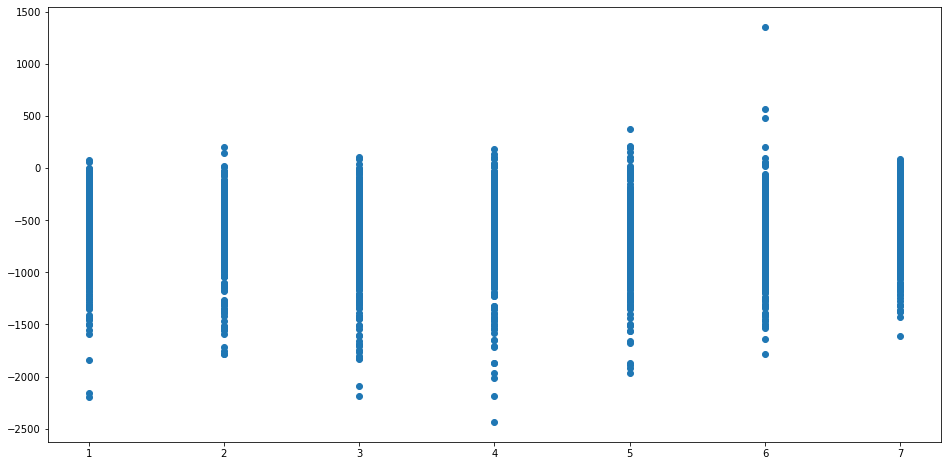

In [120]:
day1 = df['dow'] == 1
plt.scatter(df['dow'],df['dow_speed'])
plt.show()